In [14]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

# 한글 설정
# matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

In [15]:
# load spain_data
spain_data = pd.read_csv("./data/train_spain.csv")
spain_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,3
1,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0,3
2,12,15717962,Rossi,759,Spain,Male,71.0,9,0.00,1,1.0,1.0,93081.87,0,7
3,20,15781496,Udegbulam,773,Spain,Male,35.0,9,0.00,2,0.0,1.0,87549.36,0,3
4,25,15671137,Sazonova,703,Spain,Male,39.0,9,0.00,1,1.0,0.0,131363.57,1,3


In [16]:
# preprocessing 
# drop unnecessary columns ["CustomerId", "Surname"]
spain_data = spain_data.drop(columns=["CustomerId", "Surname"])
spain_data.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,3
1,7,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0,3
2,12,759,Spain,Male,71.0,9,0.00,1,1.0,1.0,93081.87,0,7
3,20,773,Spain,Male,35.0,9,0.00,2,0.0,1.0,87549.36,0,3
4,25,703,Spain,Male,39.0,9,0.00,1,1.0,0.0,131363.57,1,3


In [17]:
# 데이터를 기반으로 남성, 여성별로 AgeGroup에 따른 Exited = 1인 고객 수를 시각화
spain_data_exited = spain_data[spain_data['Exited'] == 1]

In [18]:
agegroup_exited_counts = spain_data_exited.groupby("AgeGroup").size().reset_index(name="Count")
agegroup_exited_counts

,AgeGroup,Count
0,1,13
1,2,388
2,3,1600
3,4,2610
4,5,1297
5,6,301
6,7,25
7,8,1


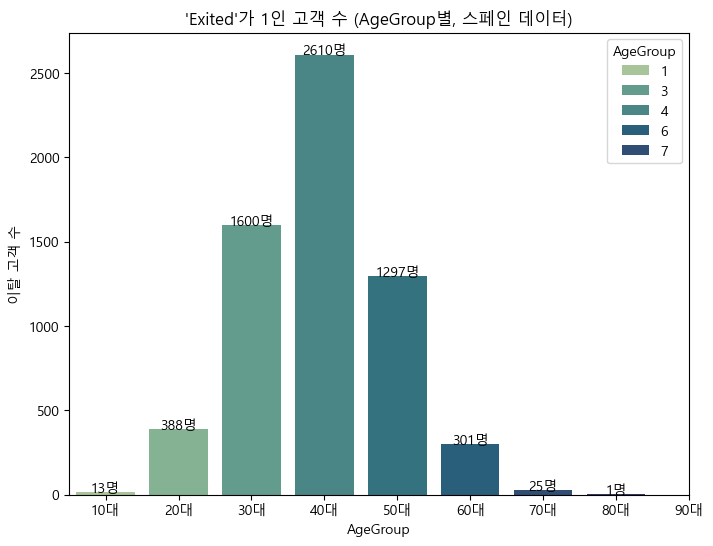

In [19]:
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=agegroup_exited_counts, 
            x="AgeGroup", y="Count",
            palette="crest", hue="AgeGroup")
plt.title("'Exited'가 1인 고객 수 (AgeGroup별, 스페인 데이터)")
plt.ylabel("이탈 고객 수")
plt.xlabel("AgeGroup")
plt.xticks(ticks=range(0, 9), labels=[f"{i}0대" for i in range(1, 10)])
for index, row in agegroup_exited_counts.iterrows():
    barplot.text(row.name, row['Count'], f"{row['Count']}명", color='black', ha="center")
plt.show()

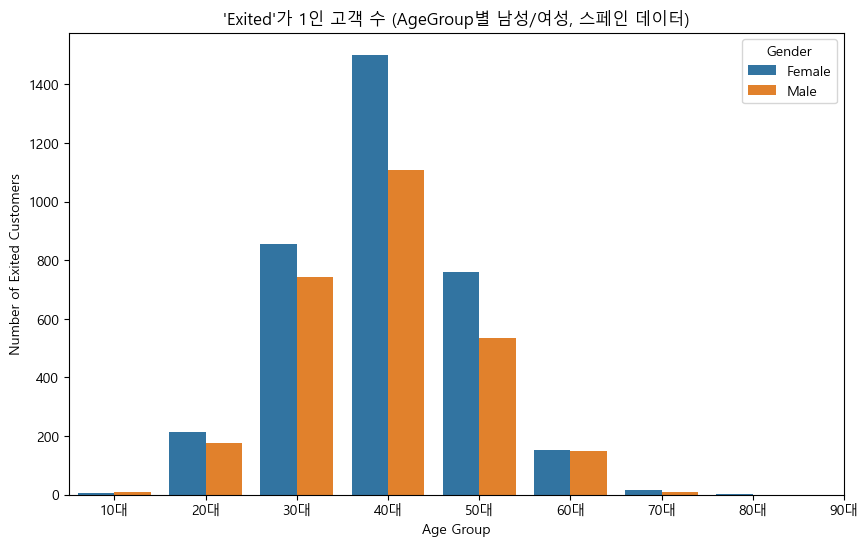

In [20]:
# 남성, 여성별로 AgeGroup에 따른 이탈 고객 수를 계산
agegroup_gender_exited_counts = spain_data_exited.groupby(['AgeGroup', 'Gender']).size().reset_index(name='Count')

# Barplot 시각화 (hue를 사용하여 Gender 구분)
plt.figure(figsize=(10, 6))
sns.barplot(data=agegroup_gender_exited_counts, x='AgeGroup', y='Count', hue='Gender')
plt.title("'Exited'가 1인 고객 수 (AgeGroup별 남성/여성, 스페인 데이터)")
plt.xlabel('Age Group')
plt.ylabel('Number of Exited Customers')
plt.xticks(ticks=range(0, 9), labels=[f'{i}0대' for i in range(1, 10)])
plt.legend(title='Gender')
plt.show()


### Age(AgeGroup) - Tenure 

In [21]:
spain_data["Tenure"].describe()

count    36213.000000
mean         5.041974
std          2.804100
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

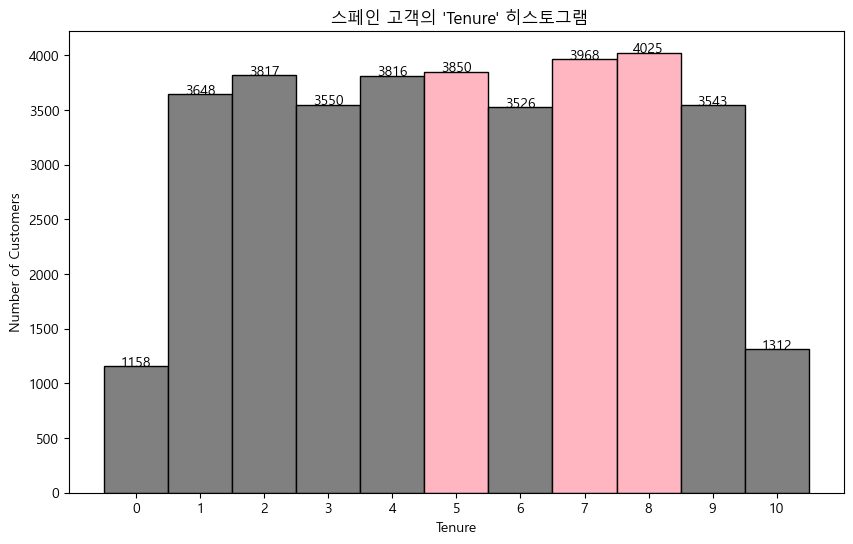

In [31]:
plt.figure(figsize=(10,6))
hist = sns.histplot(data=spain_data, x="Tenure", 
             discrete=True,)
plt.title(" 스페인 고객의 'Tenure' 히스토그램")
plt.ylabel("Number of Customers")
plt.xticks(range(0, 11))
# 막대 위에 고객 수 표시
for p in hist.patches:
    height = p.get_height()
    hist.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center')

# 막대들의 높이를 가져옵니다.
patches = hist.patches
frequencies = [patch.get_height() for patch in patches]

# 가장 높은 빈도를 가진 상위 3개를 찾습니다.
top_3_freq = sorted(frequencies, reverse=True)[:3]

# 각 막대의 색상을 변경합니다.
for patch in patches:
    if patch.get_height() in top_3_freq:
        patch.set_facecolor('lightpink')
        # 동일한 빈도를 가진 여러 막대가 있을 경우, 한 번만 색상을 바꾸기 위해 제거
        top_3_freq.remove(patch.get_height())
    else:
        patch.set_facecolor('gray')
plt.show()

-> 가입 기간이 8년, 2년, 4년인 고객의 수가 가장 많다. 

-> 가입 기간이 0년, 10년인 고객의 수가 압도적으로 적다. (6.37%)

-> 1년 이상 9년 이하인 고객의 수가 전체의 9할 이상 차지한다. 

-> 신규 고객과 장기 고객의 경우 극 소수이다. 

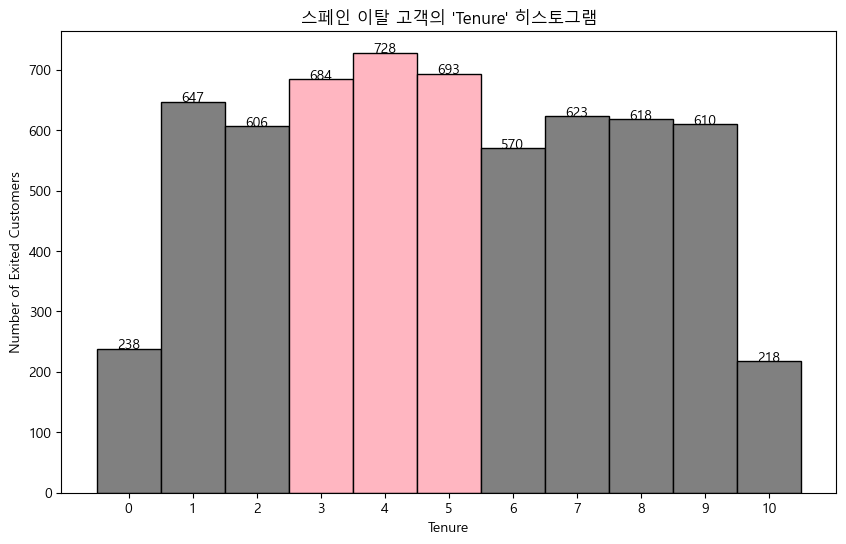

In [30]:
# 히스토그램을 그린 후 막대 위에 수치 추가
plt.figure(figsize=(10,6))
hist = sns.histplot(data=spain_data_exited, x="Tenure", 
                    discrete=True)

plt.title("스페인 이탈 고객의 'Tenure' 히스토그램")
plt.ylabel("Number of Exited Customers")
plt.xticks(range(0, 11))

# 막대 위에 고객 수 표시
for p in hist.patches:
    height = p.get_height()
    hist.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center')

# 막대들의 높이를 가져옵니다.
patches = hist.patches
frequencies = [patch.get_height() for patch in patches]

# 가장 높은 빈도를 가진 상위 3개를 찾습니다.
top_3_freq = sorted(frequencies, reverse=True)[:3]

# 각 막대의 색상을 변경합니다.
for patch in patches:
    if patch.get_height() in top_3_freq:
        patch.set_facecolor('lightpink')
        # 동일한 빈도를 가진 여러 막대가 있을 경우, 한 번만 색상을 바꾸기 위해 제거
        top_3_freq.remove(patch.get_height())
    else:
        patch.set_facecolor('gray')

plt.show()


-> 가입 기간이 3, 4, 5년이 되는 해에 이탈하는 고객이 가장 많다. 

-> 가입 기간이 0년, 10년인 고객들은 다른 가입 기간(Tenure)에 비해 이탈 고객 수가 적다. (해당 기간에 이탈 비율이 적은 것이 아님. 절대적인 숫자가 작다는 의미)

In [24]:
spain_data_tenure = pd.DataFrame(
    {
        "Tenure": np.arange(0, 11),
        # 가입 기간에 해당하는 전체 고객 수 
        "TotalCount": spain_data.groupby("Tenure")['id'].count(),
        # 가입 기간에 해당하는 전체 고객 비율 
        "TotalRatio": round(spain_data.groupby("Tenure")['id'].count() / len(spain_data), 5) * 100,
        # 가입 기간에 해당하는 이탈 고객 수 
        "ExitedCount": spain_data_exited.groupby("Tenure")['id'].count(),
        # 가입 기간에 해당하는 이탈 고객 비율 (전체 이탈 고객 대비 비율)
        "ExitedRatio": round(spain_data_exited.groupby("Tenure")['id'].count() / len(spain_data_exited), 5) * 100,
        # 전체 고객 대비 이탈 고객 비율 (스페인 전체 고객 대비 비율)
        "TotalExitedRatio" : round(spain_data_exited.groupby("Tenure")['id'].count() / len(spain_data), 5) * 100,
    }
).set_index("Tenure")
spain_data_tenure

,TotalCount,TotalRatio,ExitedCount,ExitedRatio,TotalExitedRatio
Tenure,,,,,
0,1158,3.198,238,3.817,0.657
1,3648,10.074,647,10.377,1.787
2,3817,10.540,606,9.719,1.673
3,3550,9.803,684,10.970,1.889
4,3816,10.538,728,11.676,2.010
5,3850,10.632,693,11.115,1.914
6,3526,9.737,570,9.142,1.574
7,3968,10.957,623,9.992,1.720
8,4025,11.115,618,9.912,1.707


In [25]:
spain_data_tenure["ExitedTenureRatio"] = round(spain_data_tenure["ExitedCount"] / spain_data_tenure["TotalCount"], 5) * 100
spain_data_tenure

,TotalCount,TotalRatio,ExitedCount,ExitedRatio,TotalExitedRatio,ExitedTenureRatio
Tenure,,,,,,
0,1158,3.198,238,3.817,0.657,20.553
1,3648,10.074,647,10.377,1.787,17.736
2,3817,10.540,606,9.719,1.673,15.876
3,3550,9.803,684,10.970,1.889,19.268
4,3816,10.538,728,11.676,2.010,19.078
5,3850,10.632,693,11.115,1.914,18.000
6,3526,9.737,570,9.142,1.574,16.166
7,3968,10.957,623,9.992,1.720,15.701
8,4025,11.115,618,9.912,1.707,15.354


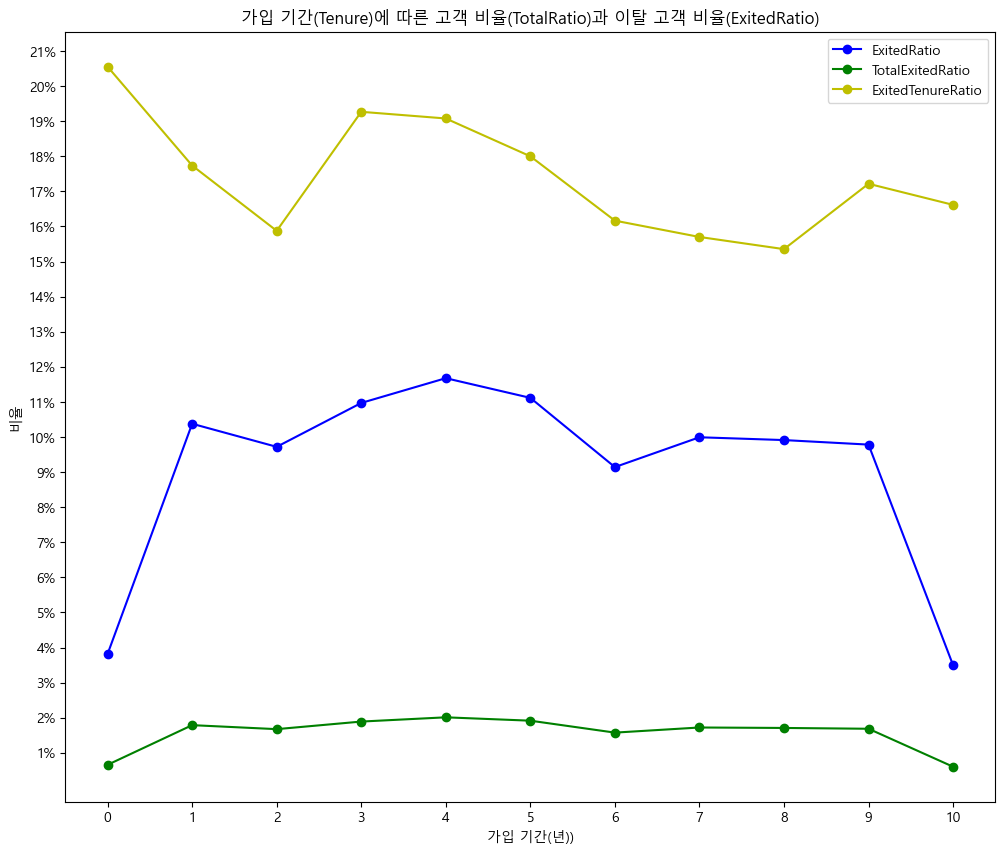

In [26]:
plt.figure(figsize=(12, 10))
# 전스페인 전체 고객 수 대비, 해당 가입 기간에 속하는 고객의 비율 
# plt.plot(spain_data_tenure["TotalRatio"], "ro-", label="TotalRatio(스페인 전체 고객 대비 비율)")

# 스페인 이탈 고객 수 대비, 해당 가입 기간에 속하는 이탈 고객 비율 
plt.plot(spain_data_tenure["ExitedRatio"], "bo-", label="ExitedRatio")

# 스페인 전체 고객 수 대비, 해당 가입 기간에 속하는 이탈 고객 비율 
plt.plot(spain_data_tenure["TotalExitedRatio"], "go-", label="TotalExitedRatio")

# Tenure에 속하는 고객 수 대비, 해당 가입 기간에 속하는 이탈 고객 비율 
plt.plot(spain_data_tenure["ExitedTenureRatio"], "yo-", label="ExitedTenureRatio")

plt.xticks(np.arange(0, 11))
plt.yticks(np.arange(1, 22), labels=[f"{i}%" for i in range(1, 22)])
plt.title("가입 기간(Tenure)에 따른 고객 비율(TotalRatio)과 이탈 고객 비율(ExitedRatio)")
plt.xlabel("가입 기간(년))")
plt.ylabel("비율")
plt.legend()
plt.show()


1. **ExitedRatio** (Blue, 스페인 전체 이탈 고객 수 대비, 해당 가입 기간에 이탈한 고객 비율)  
   1. 스페인의 이탈 고객 중 가입 기간이 1년 이상 10년 미만인 이탈 고객이 스페인 전체 이탈 고객의 90% 이상을 차지한다. 
   2. 스페인의 이탈 고객 중 가입 기간이 1년 미만 혹은 10년 이상인 이탈 고객은 스페인 전체 이탈 고객 중 약 7%를 차지한다.
   3. 스페인의 이탈 고객 중 가입 기간이 4년인 고객의 이탈 비율이 11.676%로 가장 높은 비율을 차지한다.
   
2. **TotalExitedRatio** (Green, 스페인 전체 고객 수 대비, 해당 가입 기간에 이탈한 고객 비율)  
   1. 스페인 전체 고객 중 가입 기간이 1년 미만 혹은 10년 이상인 경우, 각각 200명 초반의 이탈 고객을 가진다. 
   2. 스페인 전체 고객 중 가입 기간이 1년 이상 혹은 10년 미만인 경우, 5~700명의 이탈 고객을 가진다. 
   
3. **ExitedTenureRatio** (Yellow, 각각의 가입 기간에 해당하는 전체 스페인 고객 수 대비, 해당 가입 기간에 이탈한 고객 비율)  
   1. 가입 기간이 1년 미만인 스페인 고객(1168) 중 이탈 고객은 238명으로 약 20%를 차지한다.  
      (가입한 지 1년도 되지 않았지만 이탈하는 고객이 5명중 1명)
   2. 가입 기간이 각각 2년, 7년, 8년인 스페인 고객 중 이탈 고객은 각각 약 15%대로 그나마 낮은 비율을 차지한다.  
   -> 가입 기간이 몇년 되었든, 15% 이상은 이탈을 한다.

가입기간이 2년에서 3년이 되는 시점에 이탈 고객이 증가하는 경향을 보이는 것 같다.(ExitedTenureRatio 기준)

5년에서 6년으로 넘어가면서 약간의 안정기? 가 되는 것 같은 경향을 보인다.

In [32]:
# Tenure 그룹화 
# 0 ~ 2: 1
# 3 ~ 5: 2
# 6 ~ 8: 3
# 9 ~ 10: 4

def get_group_of_tenure(tenure):
    if tenure >= 9:
        return 4
    elif tenure >= 6:
        return 3
    elif tenure >= 3:
        return 2
    else:
        return 1 

In [35]:
spain_data_exited.loc[:, 'Tenure Group'] = spain_data_exited['Tenure'].apply(get_group_of_tenure)
spain_data_exited.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,Tenure Group
4,25,703,Spain,Male,39.0,9,0.00,1,1.0,0.0,131363.57,1,3,4
6,28,785,Spain,Male,41.0,4,0.00,1,1.0,0.0,170968.99,1,4,2
7,32,797,Spain,Female,55.0,0,99208.46,2,0.0,1.0,62402.38,1,5,1
12,67,648,Spain,Male,56.0,0,110939.30,1,1.0,1.0,92927.42,1,5,1
20,96,659,Spain,Female,39.0,0,107042.74,1,1.0,0.0,102284.20,1,3,1


In [37]:
spain_data.loc[:, 'Tenure Group'] = spain_data['Tenure'].apply(get_group_of_tenure)
spain_data.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,Tenure Group
0,4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,3,2
1,7,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0,3,1
2,12,759,Spain,Male,71.0,9,0.00,1,1.0,1.0,93081.87,0,7,4
3,20,773,Spain,Male,35.0,9,0.00,2,0.0,1.0,87549.36,0,3,4
4,25,703,Spain,Male,39.0,9,0.00,1,1.0,0.0,131363.57,1,3,4


In [41]:
exited_count_by_tenure_group = spain_data_exited.groupby("Tenure Group").count().iloc[:, 0]
exited_count_by_tenure_group.values

array([1491, 2105, 1811,  828])

In [40]:
customer_count_by_tenure_group = spain_data.groupby("Tenure Group").count().iloc[:, 0]
customer_count_by_tenure_group

Tenure Group
1     8623
2    11216
3    11519
4     4855
Name: id, dtype: int64

In [44]:
exited_rate_by_tenure_group = exited_count_by_tenure_group / customer_count_by_tenure_group * 100

In [45]:
exited_rate_by_tenure_group

Tenure Group
1    17.290966
2    18.767832
3    15.721851
4    17.054583
Name: id, dtype: float64